<a href="https://colab.research.google.com/github/Akua-Amoabea/Smoke_detection-using-Machine-Learning/blob/main/SMOKE_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **COMPARATIVE STUDY OF SMOKE DETECTION FOR REAL-TIME IOT APPLICATIONS USING  LOGISTIC REGRESSION, ANN & DECISION TREE**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
np.random.seed(0)
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/smoke_detection_iot.csv')

In [ ]:
data.head()

In [ ]:
# The size of the dataset
data.shape

In [ ]:
data['Fire Alarm'].value_counts().plot.bar()

In [ ]:
# Shuffling the dataset
data = data.sample(frac = 1)
data.head()

In [ ]:
data_features = data.columns[:-1].to_list()
x = data[data_features].values
y = data['Fire Alarm'].values



In [ ]:
# splitting dataset into train, test & Validation set
X_train, X_, y_train, y_ = train_test_split(x, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=.5, random_state=42)
print(f"X train {X_train.shape}")
print(f"X val {X_val.shape}")
print(f"X test {X_test.shape}")
print(f"Y train {y_train.shape}")
print(f"Y val {y_val.shape}")
print(f"Y test {y_test.shape}")

In [ ]:
#Feature Scaling for normalization using MinMax Scaler
scalar = MinMaxScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_val = scalar.transform(X_val)
X_test = scalar.transform(X_test)

# **Training Data using Logisitic Regression**

In [ ]:
logreg = LogisticRegression(C=50).fit(X_train, y_train)
L_train = logreg.score(X_train, y_train)
L_Val= logreg.score(X_val,y_val)
L_test = logreg.predict(X_test)
print(f"Training accuracy: {L_train}")
print(f"Validation accuracy: {L_Val}")



# **Training Data on ANN**

In [ ]:
model = Sequential()
model.add(Dense(units= 16, activation ='relu'))
model.add(Dense(units= 128, activation = 'relu'))
model.add(Dense(units= 512, activation = 'relu'))
model.add(Dense(units= 1, activation = 'sigmoid'))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, verbose=1)

In [ ]:
model.summary()

NameError: name 'model' is not defined

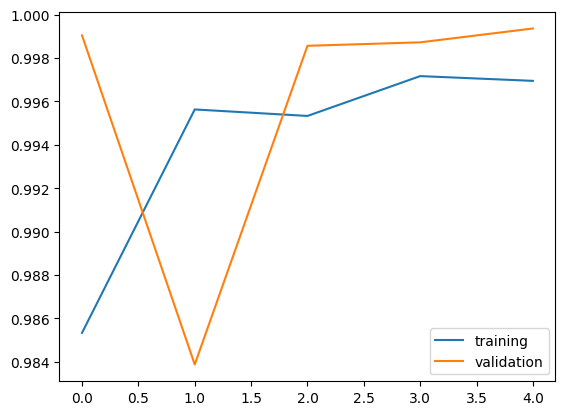

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])

# **Training  Data using Descision Tree**

In [ ]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
T_train = tree.score(X_train, y_train)
T_Val= tree.score(X_val,y_val)

print(f"Training accuracy: {T_train}")
print(f"Validation accuracy: {T_Val}")

Training accuracy: 1.0
Validation accuracy: 1.0
